# Влияние COVID-19 на рынок и промышленность США

Исходные данные заключены в трёх датасетах:
- Распродажи в супермаркетах
- Цены акций США
- Расходы на личное потребление по основным видам продукции: продукты питания, услуги, медицинские товары, товары длительного и кратковременного пользования.

In [25]:
import pandas as pd
sales = pd.read_csv('sales.csv')
stocks = pd.read_csv('nasdaq.csv')
food = pd.read_csv('food.csv')
services = pd.read_csv('services.csv')
medical = pd.read_csv('medicine.csv')
durable = pd.read_csv('durable.csv')
nondurable = pd.read_csv('nondurable.csv')
display(sales.head(1))
display(stocks.head(1))
display(food.head(1))
display(services.head(1))
display(medicine.head(1))
display(durable.head(1))
display(nondurable.head(1))

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-25,5635.859863,5658.589844,5634.330078,5656.339844,5656.339844,1959950000


,Date,Expenditure
0,2011-01-01,803.3


,Date,Expenditure
0,2011-01-01,6985.1


,Date,Expenditure
0,2016-01-01,547.6


,Date,Expenditure
0,2011-01-01,1085.0


,Date,Expenditure
0,2011-01-01,2365.4


## 1. Рынок до начала эпидемии коронавируса

Выполним проверку данных и преобразование дат в формат даты:

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
sales['Date'] = pd.to_datetime(sales['Date'])

###  Визуализация продаж

На следующем графике отображены распределения продаж по сумме покупки для различных категорий продуктов. В категориях "Здоровье и красота" и "Спорт и туризм" самая высокая медианная сумма покупки, в то время как у "Моды и аксессуаров" - самая низкая.

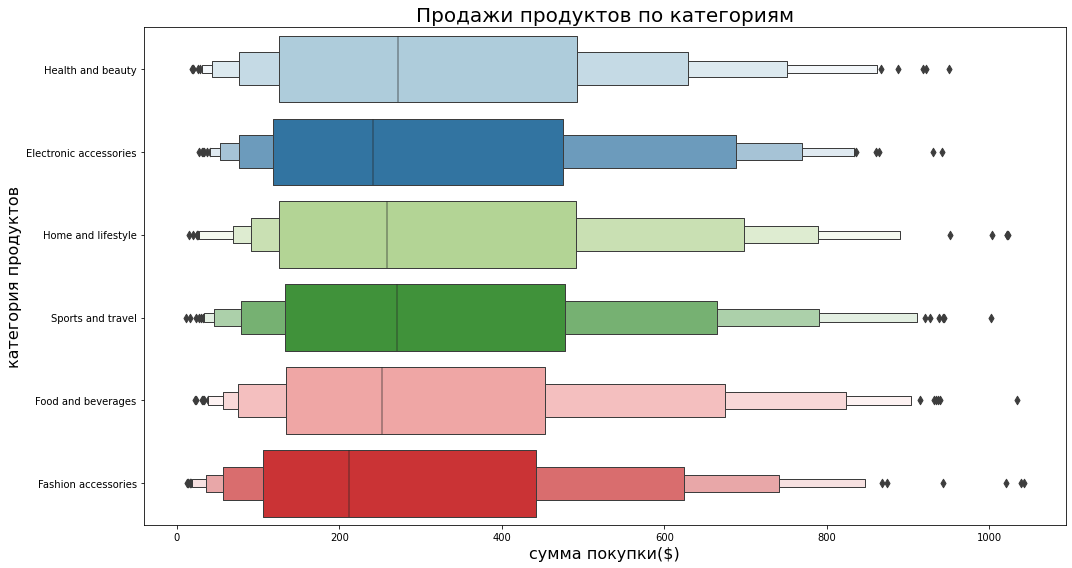

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 8))
ax = sns.boxenplot(data = sales, x = 'Total', y = 'Product line', palette = 'Paired')
ax.set_title('Продажи продуктов по категориям', fontsize = 20)
ax.set_xlabel('сумма покупки($)', fontsize = 16)
ax.set_ylabel('категория продуктов', fontsize = 16)
plt.tight_layout()

In [ ]:
total = sales.groupby('Product line')['Total'].sum().sort_values(ascending = False)\
.to_frame(name = 'Total sum').reset_index()
total

Отобразим сумму продаж по категориям за весь период в виде круговой диаграммы

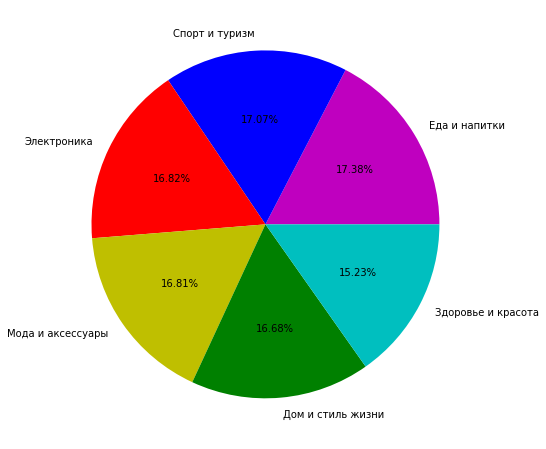

In [54]:
colors = ['m', 'b', 'r', 'y', 'g', 'c']
labels = ['Еда и напитки', 'Спорт и туризм', 'Электроника', 'Мода и аксессуары', 'Дом и стиль жизни', 'Здоровье и красота']
plt.figure(figsize = (8, 8))
plt.pie(total['Total sum'], labels = labels, colors = colors, autopct = '%1.2f%%')
plt.show()

В этом случае лидирующие позиции совершенно у других категорий по сравнению с медианой суммы покупки. Наибольшая сумма продаж в категории "Еда и напитки", наименьшая - в категории "Здоровье и красота".  
Далее сгруппируем сумму продаж по каждому месяцу, чтобы увидеть её изменение за рассматриваемый период в каждой из категорий.

,Month,Product line,Total
0,01/2019,Electronic accessories,18831.2880
1,01/2019,Fashion accessories,19345.1160
2,01/2019,Food and beverages,19570.5300
3,01/2019,Health and beauty,16383.1710
4,01/2019,Home and lifestyle,20494.7400
5,01/2019,Sports and travel,21667.0230
6,02/2019,Electronic accessories,17362.9050
7,02/2019,Fashion accessories,19009.8615
8,02/2019,Food and beverages,20000.3580
9,02/2019,Health and beauty,14602.2555


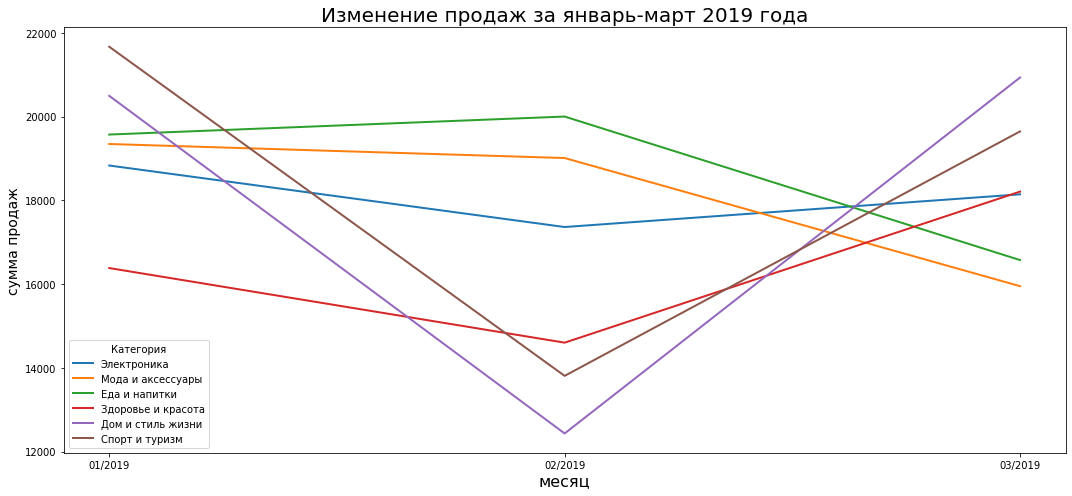

In [6]:
import datetime as dt
sales['Month'] = sales.Date.dt.strftime('%m/%Y')
total_sales = sales.groupby(['Month', 'Product line'], as_index = False)['Total'].sum()

display(total_sales)
plt.figure(figsize = (15, 7))
ax = sns.lineplot(data = total_sales, x = 'Month', y = 'Total', hue = 'Product line',
                  linewidth = 2)
labels = ['Электроника', 'Мода и аксессуары', 'Еда и напитки', 'Здоровье и красота', 'Дом и стиль жизни', 'Спорт и туризм']

ax.set_xlabel('месяц', fontsize = 16)
ax.set_ylabel('сумма продаж', fontsize = 14)
plt.legend(title = 'Категория', loc = 'lower left', labels = labels)
ax.set_title('Изменение продаж за январь-март 2019 года', fontsize = 20)

plt.tight_layout()

В категориях "Дом и стиль жизни" и "Спорт и туризм" наблюдается резкое падение продаж в феврале, а затем резкий рост в марте. В категориях "Здоровье и красота" и "Электроника" данная тенденция не так ярко выражена. В категориях "Еда и напитки" и "Мода и аксессуары" видно снижение продаж в марте по сравнению с двумя предыдущими месяцами.

## 2. Рынок во время эпидемии коронавируса

Изучим данные акций биржевого индекса NASDAQ.

In [120]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-25,5635.859863,5658.589844,5634.330078,5656.339844,5656.339844,1959950000
1,2017-01-26,5666.279785,5669.609863,5647.649902,5655.180176,5655.180176,1827490000
2,2017-01-27,5664.879883,5667.450195,5643.899902,5660.779785,5660.779785,1663400000
3,2017-01-30,5635.859863,5636.089844,5578.759766,5613.709961,5613.709961,1777090000
4,2017-01-31,5592.870117,5615.149902,5576.089844,5614.790039,5614.790039,2041480000


In [117]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       902 non-null    object 
 1   Open       902 non-null    float64
 2   High       902 non-null    float64
 3   Low        902 non-null    float64
 4   Close      902 non-null    float64
 5   Adj Close  902 non-null    float64
 6   Volume     902 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 49.5+ KB


In [118]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,902.000000,902.000000,902.000000,902.000000,902.000000,9.020000e+02
mean,7615.608775,7662.853394,7564.854198,7618.256937,7618.256937,2.403718e+09
std,1176.609690,1189.248748,1163.821319,1179.035061,1179.035061,8.643129e+08
min,5592.870117,5615.149902,5576.089844,5613.709961,5613.709961,1.494100e+08
25%,6813.964966,6869.264892,6755.797363,6798.177490,6798.177490,1.902792e+09
50%,7541.954834,7586.040039,7482.199951,7532.269775,7532.269775,2.128045e+09
75%,8123.179809,8155.979858,8072.192383,8117.459961,8117.459961,2.459798e+09
max,11449.250000,11462.049805,11297.530273,11379.719727,11379.719727,7.279230e+09


In [7]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

## График изменения средней цены индекса NASDAQ за 2020 год

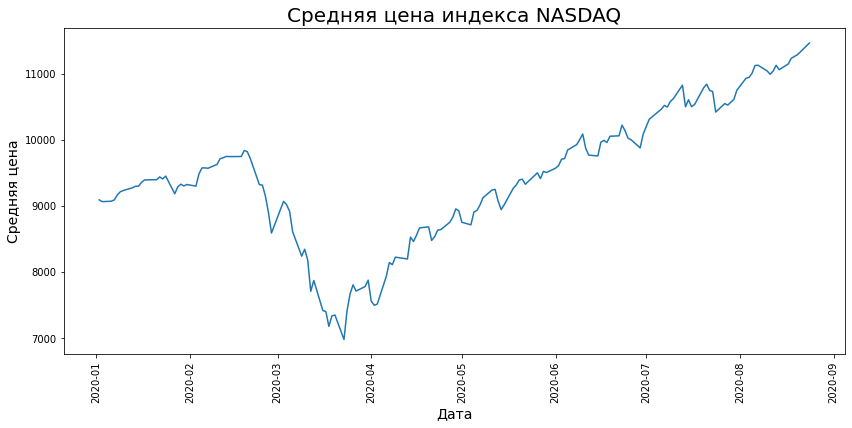

In [18]:
mean = stocks.groupby('Date').mean()
mean = mean.loc[mean.index > '2020-01-01'].copy()
plt.figure(figsize = (14, 6))
plt.title('Средняя цена индекса NASDAQ', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Средняя цена', fontsize = 14)
plt.plot(mean.index,mean['High'])
plt.show()

Из графика видно, что в феврале-марте 2020 года цена акций резко упала. Рассмотрим внимательно этот период. В течение месяца он снизился с 9700 до 7000, то есть примерно на 28%. Это может быть совпадением, но существует очень высокая вероятность того, что на него действительно повлияла пандемия. 
Далее выясним, какая отрасль пострадала больше всего.

## Анализ отраслей промышленности

In [38]:
food['Date'] = pd.to_datetime(food['Date'])
food1 = food.loc[food.Date > '2019-01-01'].copy().reset_index(drop=True)
food1['Category'] = 'Food'

services['Date'] = pd.to_datetime(services['Date'])
services1 = services.loc[services.Date > '2019-01-01'].copy().reset_index(drop=True)
services1['Category'] = 'Services'

medical['Date'] = pd.to_datetime(medical['Date'])
medical1 = medical.loc[medical.Date > '2019-01-01'].copy().reset_index(drop=True)
medical1['Category'] = 'Medical'

durable['Date'] = pd.to_datetime(durable['Date'])
durable1 = durable.loc[durable.Date > '2019-01-01'].copy().reset_index(drop=True)
durable1['Category'] = 'Durable'

nondurable['Date'] = pd.to_datetime(nondurable['Date'])
nondurable1 = nondurable.loc[nondurable.Date > '2019-01-01'].copy().reset_index(drop=True)
nondurable1['Category'] = 'Nondurable'

new = pd.concat([durable1, food1, nondurable1, medical1, services1], axis=0).reset_index(drop=True)
new

,Date,Expenditure,Category
0,2019-02-01,1476.9,Durable
1,2019-03-01,1517.2,Durable
2,2019-04-01,1520.5,Durable
3,2019-05-01,1539.6,Durable
4,2019-06-01,1547.8,Durable
...,...,...,...
80,2020-02-01,10309.2,Services
81,2020-03-01,9379.8,Services
82,2020-04-01,8200.2,Services
83,2020-05-01,8675.7,Services


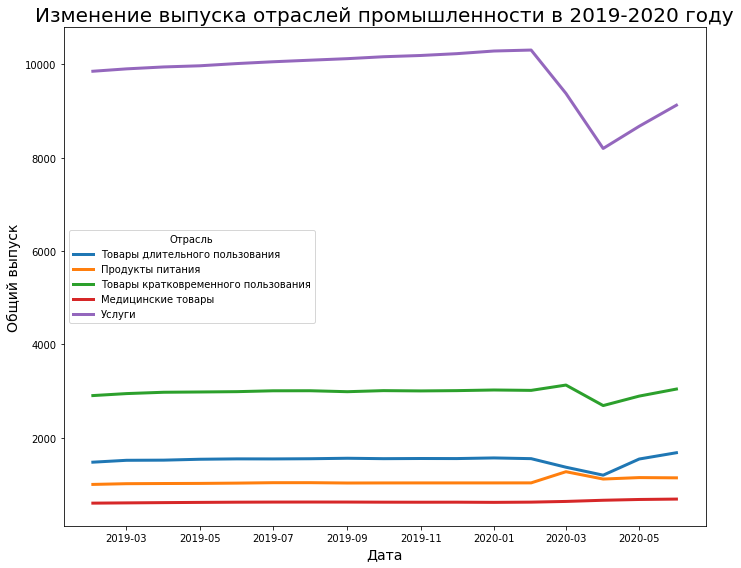

In [48]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = new, x = 'Date', y = 'Expenditure', hue = 'Category',
                  linewidth = 3)
labels = ['Товары длительного пользования', 'Продукты питания', 'Товары кратковременного пользования', 'Медицинские товары', 'Услуги']

ax.set_xlabel('Дата', fontsize = 14)
ax.set_ylabel('Общий выпуск', fontsize = 14)
plt.legend(title = 'Отрасль', loc = 'center left', labels = labels)
ax.set_title('Изменение выпуска отраслей промышленности в 2019-2020 году', fontsize = 20)

plt.tight_layout()

Здесь наблюдается интересная тенденция. Мы видим, что почти все отрасли сократили выпуск примерно в феврале, что и ожидалось, за исключением двух - продуктов питания и медицинских товаров.  Рассмотрим изменения в каждой отрасли отдельно. 

### Индустрия здравоохранения

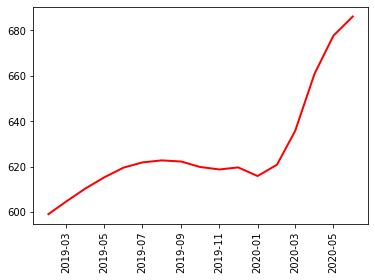

In [65]:
plt.xticks(rotation = 'vertical')
plt.plot(medical1.Date, medical1['Expenditure'], color = 'r', linewidth = 2)
plt.show()

### Пищевая промышленность

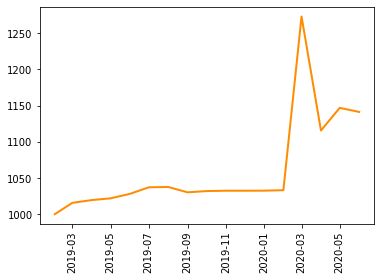

In [59]:
plt.xticks(rotation = 'vertical')
plt.plot(food1.Date, food1['Expenditure'], color = 'darkorange', linewidth = 2)
plt.show()

Интересно, как пищевая индустрия росла примерно полмесяца и так же быстро падала. Это можно было бы оправдать паникой, поднявшейся среди населения в начале вспышки эпидемии. После того как правительство ввело карантин, общественность начала запасаться продуктами питания и бакалеей, что привело к скачку спроса. Однако он был коротким и резким, поэтому вскоре произошло падение. Тем не менее, промышленность все еще сталкивается с взлетами и падениями, так как часть населения все еще стремится запасаться продуктами.  
### Сфера услуг

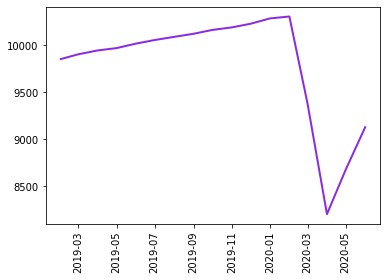

In [60]:
plt.xticks(rotation = 'vertical')
plt.plot(services1.Date, services1['Expenditure'], color = 'blueviolet', linewidth = 2)
plt.show()

### Промышленность товаров длительного пользования

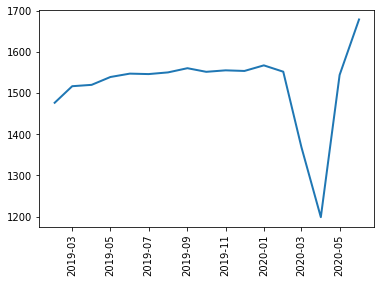

In [63]:
plt.xticks(rotation = 'vertical')
plt.plot(durable1.Date, durable1['Expenditure'], linewidth = 2)
plt.show()

### Промышленность товаров кратковременного пользования

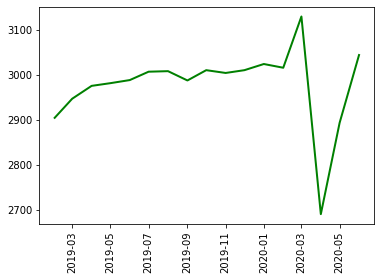

In [64]:
plt.xticks(rotation = 'vertical')
plt.plot(nondurable1.Date, nondurable1['Expenditure'], color = 'g', linewidth = 2)
plt.show()

## Выводы

Во втором квартале 2020 года совокупные потребительские расходы, по данным Бюро экономического анализа, составили 13 триллионов долларов. Это на 34,6% меньше, чем в первом квартале 2020 года, когда они уже снизились на 6,9% по сравнению с 2019 годом. Расходы на товары длительного пользования, такие как автомобили, упали на 13,8%. Расходы на услуги, такие как парикмахерские, упали на 9,8%. Расходы на продукты питания, такие как бакалея, выросли на 8,0%. Розничные продажи в США во втором квартале упали на 8,1% по сравнению с тем же кварталом 2019 года, согласно данным Бюро переписи населения. Годовой темп роста розничных продаж значительно ниже среднего показателя в 3% годовых. Многие магазины закрылись, а потребители остались дома, чтобы избежать заражения. Это способствовало увеличению онлайн-продаж на 24,9%, поскольку покупатели чувствуют себя в большей безопасности, заказывая доставку товаров. Сейчас это перерастает в  долгосрочную тенденцию.